In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 


In [2]:
df = pd.read_csv("titanic_train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

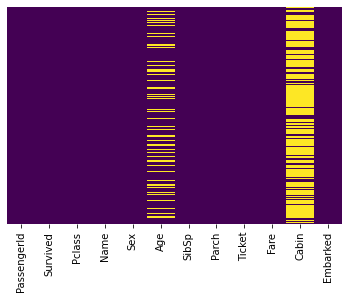

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar = False,cmap="viridis")

<AxesSubplot:xlabel='Survived', ylabel='count'>

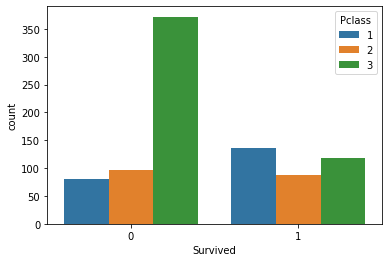

In [10]:
sns.countplot(x="Survived", data =df,hue ="Pclass")

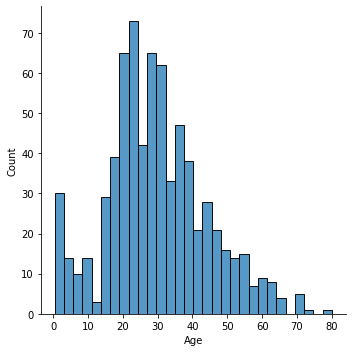

In [12]:
sns.displot(df["Age"].dropna(),kde=False,bins=30)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

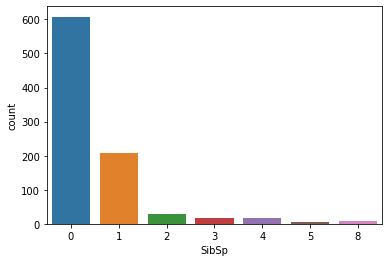

In [15]:
sns.countplot(x="SibSp",data=df)

<AxesSubplot:>

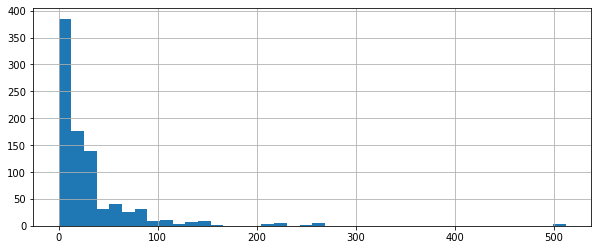

In [18]:
df["Fare"].hist(bins=40,figsize= (10,4))

In [19]:
import cufflinks as cf 

In [20]:
cf.go_offline()

In [21]:
from sklearn.model_selection import train_test_split

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

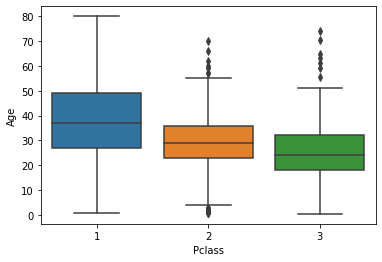

In [22]:
sns.boxplot(x="Pclass",y="Age",data=df)

In [24]:
def impute_age(cols):
    Age = cols[0]
    Pclass =cols[1]

    if pd.isnull(Age):

        if Pclass ==1:
            return 37
        elif Pclass == 2:
            return 29
        else: 
            return 24
    else : 
        return Age 

In [25]:
df["Age"] = df[["Age","Pclass"]].apply(impute_age,axis=1)

<AxesSubplot:>

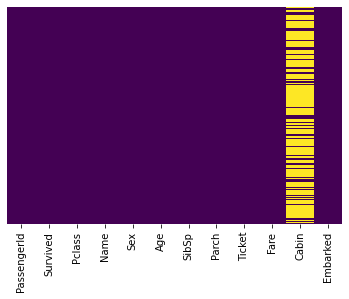

In [26]:
sns.heatmap(df.isnull(),yticklabels = False, cbar=False, cmap="viridis")

In [27]:
df.drop("Cabin",axis=1,inplace=True)

<AxesSubplot:>

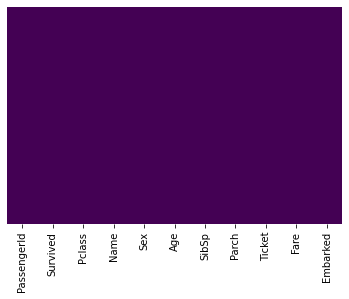

In [28]:
sns.heatmap(df.isnull(),yticklabels = False, cbar=False, cmap="viridis")

In [29]:
df.dropna(inplace = True)

In [30]:
def ismale(sex):
    if sex.lower() == "male":
        return 1
    else:
        return 0

df["Gender"] = df["Sex"].apply(lambda x : ismale(x) )

In [31]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [34]:
embark = pd.get_dummies(df["Embarked"],drop_first=True)

In [35]:
df = pd.concat([df,embark],axis=1)

In [36]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


In [38]:
df.drop(["Sex","Embarked","Name","Ticket"],axis=1,inplace=True)

In [39]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [40]:
df.drop("PassengerId",axis=1,inplace=True)

In [41]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [42]:
X = df.drop("Survived",axis=1)
y = df["Survived"]


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
logmodel = LogisticRegression()

In [46]:
logmodel.fit(X_train,y_train)

c:\Users\Bhaskar Ruthvik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [47]:
predictions = logmodel.predict(X_test)

In [48]:
from sklearn.metrics import classification_report

In [49]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



In [50]:
from sklearn.metrics import confusion_matrix

In [51]:
print(confusion_matrix(y_test,predictions))

[[147  16]
 [ 30  74]]
